In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install piq pyiqa

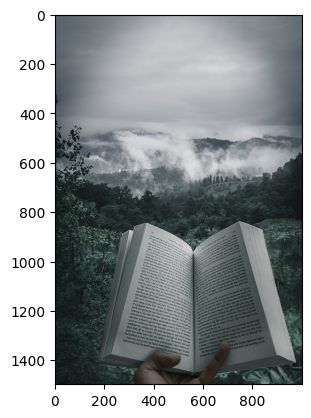

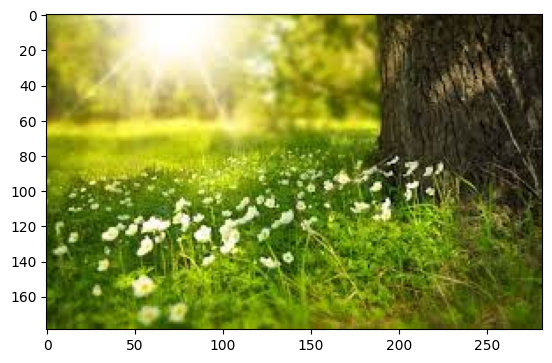

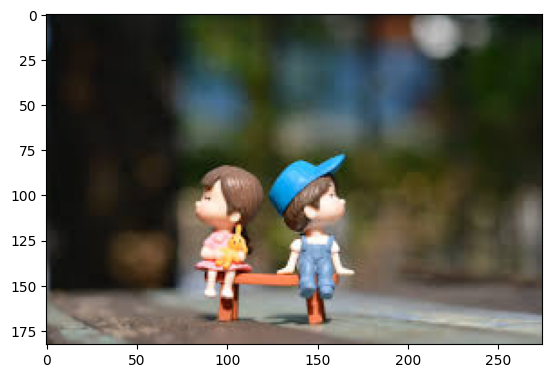

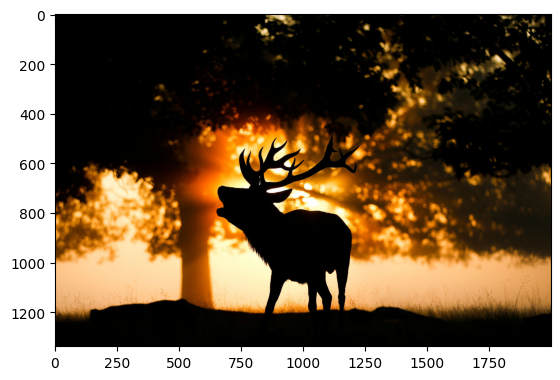

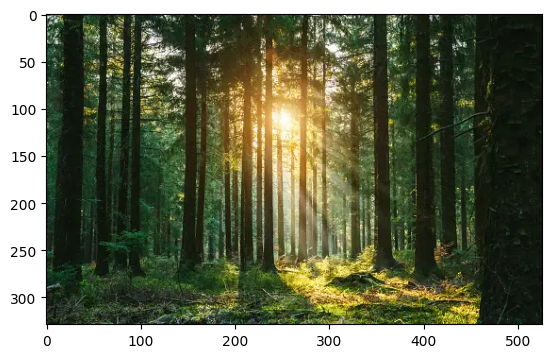

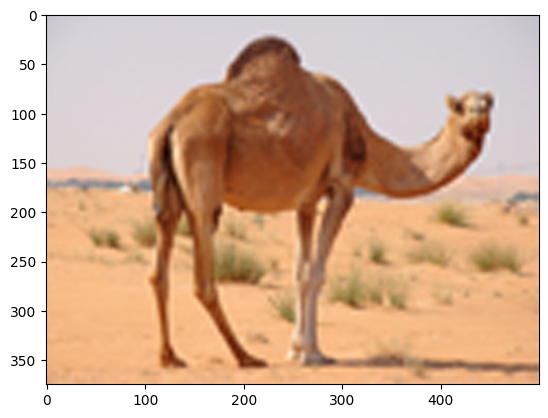

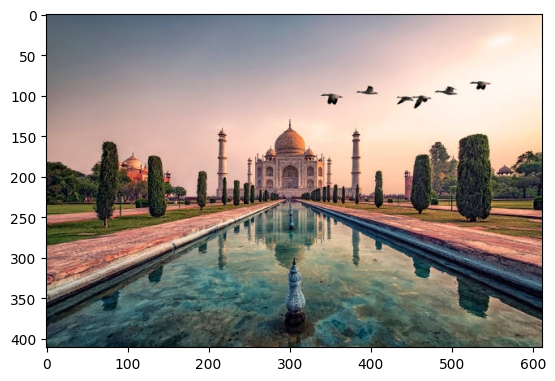

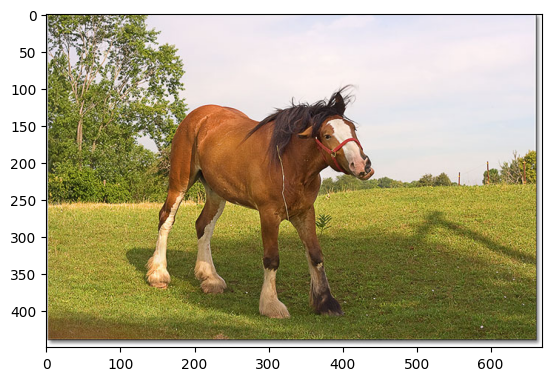

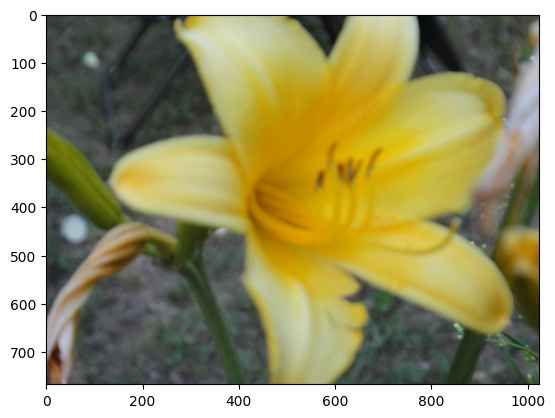

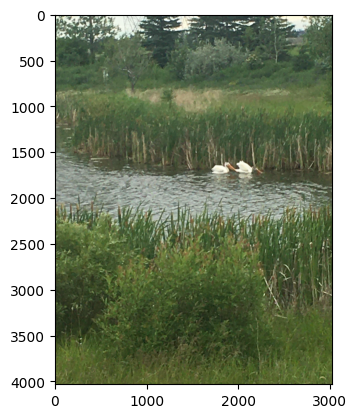

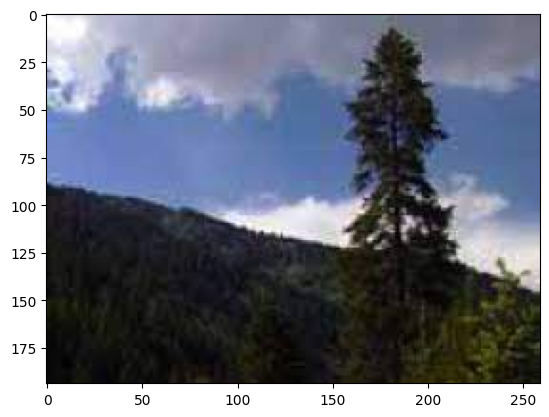

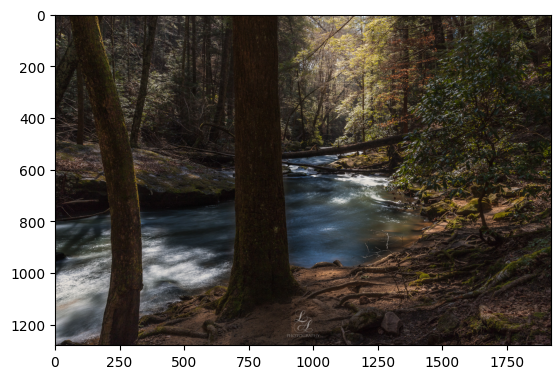

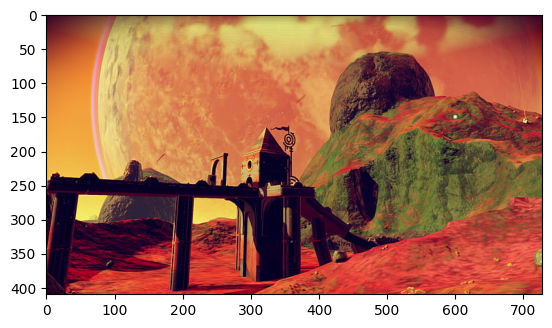

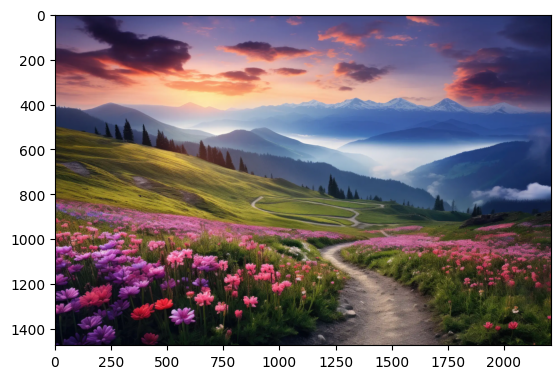

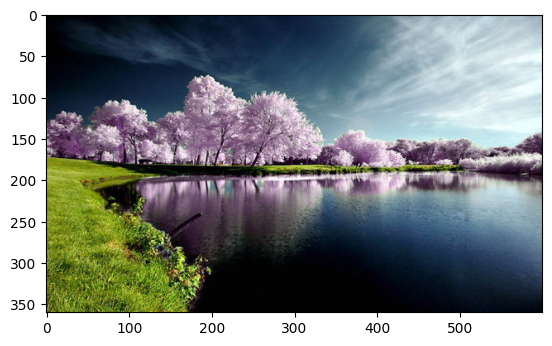

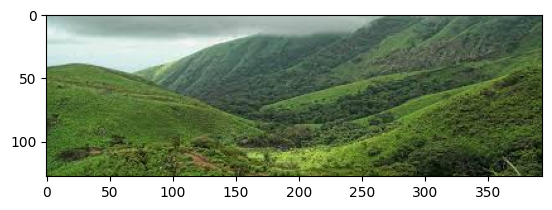

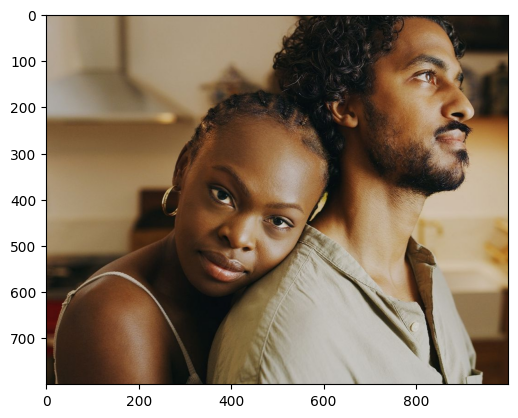

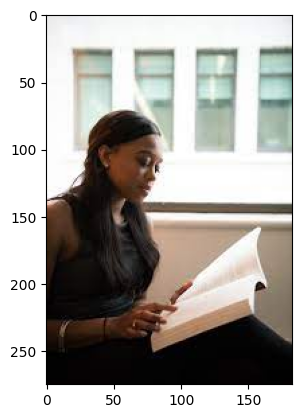

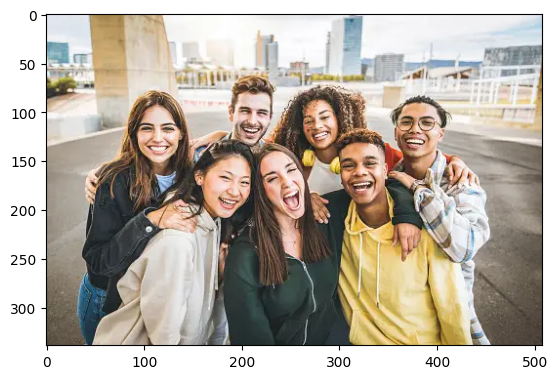

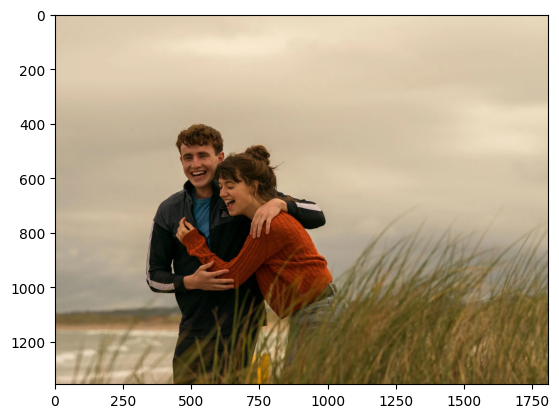

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

imgs = os.listdir('/content/drive/My Drive/MLT/Img')
for i in range(len(imgs)):
    image = cv2.imread(f'/content/drive/My Drive/MLT/Img/{imgs[i]}')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

In [ ]:
import pandas as pd

ranks = [3,5,4,2,0,1,0,4,3,4,4,5,2,0,2,4,1,3,3,5]
df = pd.DataFrame({'Image': imgs, 'Rank':ranks})
df.head()

Image  Rank
0  photo-1541963463532-d68292c34b19.jpeg     3
1                          Untitled.jpeg     5
2                            images.jpeg     4
3                           original.jpg     2
4    istockphoto-1419410282-170667a.jpeg     0

In [ ]:
"""TV, BRISQUE and NIMA"""
import tensorflow as tf
import piq
import torch
import numpy as np
import pyiqa

nima = pyiqa.create_metric('nima')

for i, img in enumerate(imgs):
  image = cv2.imread(f'/content/drive/My Drive/MLT/Img/{img}')
  image = tf.convert_to_tensor(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), dtype=tf.float32)
  df.loc[i, 'TV'] = tf.image.total_variation(image).numpy()

  arr = image.numpy()
  arr = torch.from_numpy(arr)
  df.loc[i, 'BRISQUE'] = piq.brisque(np.transpose(arr, (2, 0, 1))[np.newaxis],data_range=255., reduction='none').numpy()

  df.loc[i, 'NIMA'] = nima(os.path.join(f'/content/drive/My Drive/MLT/Img/{img}')).numpy()[0]


Loading pretrained model NIMA from /root/.cache/torch/hub/checkpoints/NIMA_InceptionV2_ava-b0c77c00.pth


<Axes: >

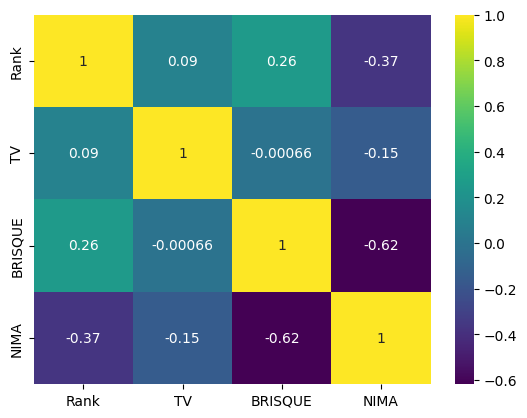

In [ ]:
import seaborn as sns
corr = df.loc[:, ~df.columns.isin(['Image'])].corr()
#corr = corr.loc[['TV','BRISQUE','NIMA'], 'Rank']
sns.heatmap(corr, annot=True, cmap = 'viridis')

# Conlusion:
For the given dataset BRISQUE was the best metric as it has the highest correlation coefficient with rank, which was assigned by a human, whereas NIMA has negative correlation with human opinion, which means the lower NIMA the more you like a picture.